In [1]:
import pandas as pd
import numpy as np
from Layer import *

df = pd.read_csv("./data/salary/train_sep.csv")

In [87]:
df_label = df.loc[:, 'income']
df_train = df.loc[:, :].drop('income', axis=1)

data_x = df_train.values.astype(np.float).T
data_y = df_label.values.astype(np.float).reshape((1, -1))

data_x = (data_x - np.mean(data_x, axis=1).reshape((-1, 1))) / np.std(data_x, axis=1).reshape((-1, 1))

In [88]:
def loss(pred, y):
    pred_log = np.log(pred + 1e-20)  # q(1) = f(x)
    no_pred_log = np.log(1.0 - pred + 1e-20)  # q(0) = 1 - f(x) ; f(x) : probability of class A(1)
    loss_val = -1. * (np.matmul(y, pred_log.T) + np.matmul((1.0 - y), no_pred_log.T))
    return loss_val

def accuarcy(pred,y):
    pred = np.rint(pred)
    return np.mean(np.equal(pred,y).astype('float'))

def grad_cross_entropy(pred,y):
    d_c_pred = -1.0 * (y / (pred + 1e-20) - (1. - y) / (1. - pred + 1e-20))  # (1,n) it is grad not loss
    return d_c_pred

def shuffle():
    seed = np.random.randint(0,1e5)
    
    #I make a big error : shuffle
    #np shuffle is shuffled by the first dim.in this example,is row
    #but we make the data_x [dim,n].so, we need transpose the data_x first and shuffle next
    np.random.seed(seed)
    np.random.shuffle(data_x.T)
    np.random.seed(seed)
    np.random.shuffle(data_y.T)


dim,n = data_x.shape
dim1 = 64
dim2 = 16
dim3 = 4
dim4 = 2
dim5 = 1

layers = [Layer(dim,dim1,relu,relu_rev),
          Layer(dim1,dim2,relu,relu_rev),
          #Layer(dim2,dim3,relu,relu_rev),
          #Layer(dim3,dim4,relu,relu_rev),
          Layer(dim2,dim5,sigmoid,sigmoid_rev)]
lr = 0.3
epochs = 2000
batch_size = n
batch_count = n // batch_size
loss_list = []
for epoch in range(epochs):
    loss_val = 0
    shuffle()
    
    for i in range(batch_count):
        a = data_x[:,i*batch_size:(i+1)*batch_size]
        y = data_y[:,i*batch_size:(i+1)*batch_size]
    
        # forward
        for layer in layers:
            a = layer.forward(a)
    
        # cross entropy
        d_c_a = grad_cross_entropy(a,y)  # (1,n) it is grad not loss
    
        # backpropagation
        for layer in reversed(layers):
            d_c_a = layer.backpropagation(d_c_a,lr)
        
        loss_val += loss(a, y)[0][0]
    
    loss_list.append(loss_val)
    if epoch %1 == 0:
            print("{:<5d},loss:{:.5f}".format(epoch,loss_val))

0    ,loss:22564.63035
1    ,loss:319157.93217
2    ,loss:20575.27148
3    ,loss:17872.06013
4    ,loss:97771.02952
5    ,loss:17264.24459
6    ,loss:16924.70642
7    ,loss:16485.54079
8    ,loss:13690.60890
9    ,loss:13369.73164
10   ,loss:13145.44782
11   ,loss:12976.81091
12   ,loss:12836.71616
13   ,loss:12716.70368
14   ,loss:12605.29677
15   ,loss:12503.75175
16   ,loss:12416.38999
17   ,loss:12335.24054
18   ,loss:12261.38454
19   ,loss:12197.20970
20   ,loss:12184.71487
21   ,loss:12079.86114
22   ,loss:12027.80424
23   ,loss:11936.41627
24   ,loss:11901.15854
25   ,loss:11850.00565
26   ,loss:11864.20022
27   ,loss:11769.54648
28   ,loss:11733.76691
29   ,loss:11642.70386
30   ,loss:11621.36810
31   ,loss:11537.64466
32   ,loss:11527.17778
33   ,loss:11473.59655
34   ,loss:11482.67469
35   ,loss:11428.76310
36   ,loss:11456.50841
37   ,loss:11400.91349
38   ,loss:11420.47304
39   ,loss:11321.51091
40   ,loss:11311.92201
41   ,loss:11245.28108
42   ,loss:11270.97230
43   ,loss

KeyboardInterrupt: 

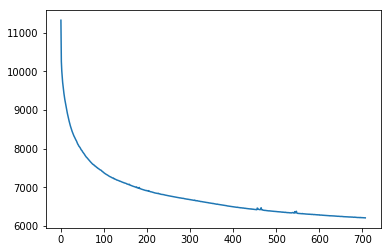

In [74]:
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.show()

In [97]:
k = np.array(range(24)).reshape(4,6)
seed = 19
np.random.seed(seed)
np.random.shuffle(k.T)
k


array([[ 1,  4,  3,  0,  2,  5],
       [ 7, 10,  9,  6,  8, 11],
       [13, 16, 15, 12, 14, 17],
       [19, 22, 21, 18, 20, 23]])